In [22]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
df_1 = pd.read_csv('output/df_1.csv', encoding='latin-1')
pd.options.display.max_columns = 0

In [24]:
df_1

,ExhibitionNumber,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionTitle,DisplayName,ExhibitionURL,Country,ArtistBio,Gender,ConstituentURL,Duration,BeginYear
0,1,1929-11-07,1929-12-07,"CÃÂ©zanne, Gauguin, Seurat, Van Gogh","Alfred H. Barr, Jr.",moma.org/calendar/exhibitions/1767,United States,"American, 1902ÃÂ1981",male,moma.org/artists/9168,30,1929
1,1,1929-11-07,1929-12-07,"CÃÂ©zanne, Gauguin, Seurat, Van Gogh",Paul CÃÂ©zanne,moma.org/calendar/exhibitions/1767,France,"French, 1839ÃÂ1906",male,moma.org/artists/1053,30,1929
2,1,1929-11-07,1929-12-07,"CÃÂ©zanne, Gauguin, Seurat, Van Gogh",Paul Gauguin,moma.org/calendar/exhibitions/1767,France,"French, 1848ÃÂ1903",male,moma.org/artists/2098,30,1929
3,1,1929-11-07,1929-12-07,"CÃÂ©zanne, Gauguin, Seurat, Van Gogh",Vincent van Gogh,moma.org/calendar/exhibitions/1767,Netherlands,"Dutch, 1853ÃÂ1890",male,moma.org/artists/2206,30,1929
4,1,1929-11-07,1929-12-07,"CÃÂ©zanne, Gauguin, Seurat, Van Gogh",Georges-Pierre Seurat,moma.org/calendar/exhibitions/1767,France,"French, 1859ÃÂ1891",male,moma.org/artists/5358,30,1929
...,...,...,...,...,...,...,...,...,...,...,...,...
34553,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Aijiro Wakita,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1942",male,moma.org/artists/6215,128,1989
34554,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Yoji Yamamoto,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1943",male,moma.org/artists/6486,128,1989
34555,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Ryuichi Yamashiro,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1920",male,moma.org/artists/6487,128,1989
34556,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Tadanori Yokoo,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1936",male,moma.org/artists/6502,128,1989


In [25]:
df_1['Gender'].value_counts()

male      23269
female     2527
Name: Gender, dtype: int64

In [26]:
gender_df = df_1[["Gender", "BeginYear", "Country"]]
gender_df

,Gender,BeginYear,Country
0,male,1929,United States
1,male,1929,France
2,male,1929,France
3,male,1929,Netherlands
4,male,1929,France
...,...,...,...
34553,male,1989,Japan
34554,male,1989,Japan
34555,male,1989,Japan
34556,male,1989,Japan


In [27]:
gender_df.dropna()

,Gender,BeginYear,Country
0,male,1929,United States
1,male,1929,France
2,male,1929,France
3,male,1929,Netherlands
4,male,1929,France
...,...,...,...
34552,male,1989,Japan
34553,male,1989,Japan
34554,male,1989,Japan
34555,male,1989,Japan


In [28]:
gender_df['Gender'].fillna('unknown')

0           male
1           male
2           male
3           male
4           male
          ...   
34553       male
34554       male
34555       male
34556       male
34557    unknown
Name: Gender, Length: 34558, dtype: object

## Donut Chart by Plotly

In [29]:
fig = px.pie(gender_df, names='Gender', title='Representación por géneros', hole=.3)
fig.show()

## One hot encoding con dummies

Transformación de la columna categórica "Gender" a numérica

In [19]:
pd.get_dummies(gender_df, columns=["Gender"]).head()

,BeginYear,Country,Gender_female,Gender_male
0,1929,United States,0,1
1,1929,France,0,1
2,1929,France,0,1
3,1929,Netherlands,0,1
4,1929,France,0,1


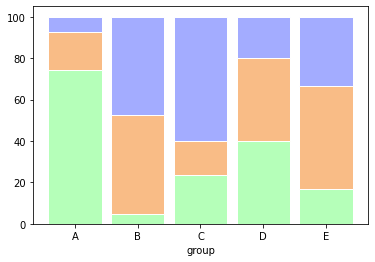

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()
